Importing pandas ; Importing monthly progress error by book value ; Importing the statsmodel ; Importing monthly progress by book value csv ; Importing matplotlib ; Importing matplotlib

In [162]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
df_progress=pd.read_csv('../data/output/monthly-progress-by-book-value.csv',sep=';')
df_error=pd.read_csv('../data/output/monthly-progress-by-book-value-error.csv',sep=';')
df_progress=df_progress.set_index(['Year','Month'])
df_error=df_error.set_index(['Year','Month'])

Visualizing the error dataframe

<Axes: >

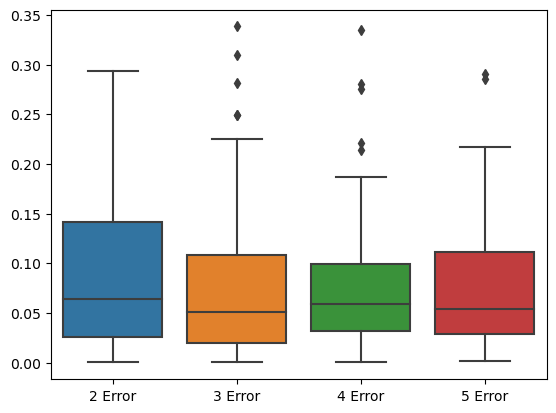

In [163]:
df_temp=df_error.abs()
sns.boxplot(data=df_temp)

Cleaning the error dataframe from outliers

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 147 entries, (2012, 1) to (2024, 5)
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2 Error  123 non-null    float64
 1   3 Error  111 non-null    float64
 2   4 Error  99 non-null     float64
 3   5 Error  87 non-null     float64
dtypes: float64(4)
memory usage: 6.0 KB
None
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 147 entries, (2012, 1) to (2024, 5)
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2 Error  114 non-null    float64
 1   3 Error  96 non-null     float64
 2   4 Error  91 non-null     float64
 3   5 Error  78 non-null     float64
dtypes: float64(4)
memory usage: 6.0 KB
None
          2 Error    3 Error    4 Error    5 Error
count  114.000000  96.000000  91.000000  78.000000
mean     0.075838   0.053281   0.061991   0.058866
std      0.063118   0.045812   0.043663   0.044392
min      0.000

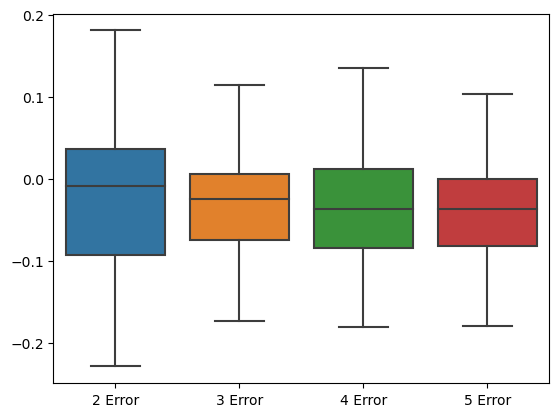

In [164]:
print(df_error.info())

for i,col in enumerate(df_temp.columns):
    Q1 = df_error[col].quantile(0.25)
    Q3 = df_error[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.1 * IQR
    upper_bound = Q3 + 1.1 * IQR
    outlier_mask=(df_error[col]<lower_bound)|(df_error[col]>upper_bound)
    df_error[col]=df_error[col].mask(outlier_mask)
sns.boxplot(data=df_error)
print(df_error.info())
print(df_error.abs().describe())

Finding the right autoregressive coeffcient

In [165]:
df_error=df_error.dropna()
ar_model = sm.tsa.ar_model.AutoReg(df_error['3 Error'], lags=1).fit()
print(ar_model.params)

AttributeError: module 'statsmodels' has no attribute 'tsa'